Machine Learning Methods used here:
1. Logistic Regression
2. Support Vector Machines**
3. Decision Tree
4. K Nearest Neighbors
5. Ensemble Methods(Random Forest, Adaboost, Gradient Boost)

За основу был взят ноутбук: https://www.kaggle.com/sanchitvj/sdss-dr16-data-analysis/notebook

In [158]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Required Libraries and Reading Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

Загружаем основную выборку со всеми классами:

In [4]:
df = pd.read_csv('./input/SpecPhotoAll_NadezdaMalysheva_1.csv') #запущена другая выборка

df.head()

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,2.994897e+17,1237648720142401611,146.71421,-1.041304,51602,266,0.021275,0.000009,GALAXY,NaN,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063
1,2.994897e+17,1237648720142401611,146.71421,-1.041304,51630,266,0.021222,0.000009,GALAXY,STARFORMING,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063
2,2.994905e+17,1237650795146445031,146.62857,-0.765137,51630,266,0.064656,0.000021,GALAXY,STARFORMING,20.89120,19.14573,18.15873,17.71922,17.33419,19.67375,17.60075,16.74682,16.30468,15.92988
3,2.994911e+17,1237648720142401670,146.63167,-0.988278,51630,266,0.052654,0.000009,GALAXY,STARFORMING,20.95082,19.93240,19.58940,19.14601,19.03190,19.41007,18.32431,17.84381,17.49257,17.44579
4,2.994916e+17,1237650794609574093,146.60721,-1.240753,51602,266,0.090633,0.000027,GALAXY,NaN,20.81802,19.12126,18.20515,17.74424,17.44748,18.93758,17.33248,16.35845,15.94122,15.62764


Загружаем выборку со всем звездами:

In [5]:
df_star = pd.read_csv('./input/SpecPhotoAll_star.csv') 

df_star.head()

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,2.994933e+17,1237650795146576079,146.91375,-0.644481,51602,266,0.000661,0.000023,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
1,2.994935e+17,1237650795146576079,146.91375,-0.644481,51630,266,0.000601,0.000020,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
2,2.994954e+17,1237650795683643399,147.25534,-0.319337,51602,266,-0.000203,0.000017,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
3,2.994965e+17,1237650795683643399,147.25534,-0.319337,51630,266,-0.000244,0.000018,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
4,2.994974e+17,1237648721216340121,147.09176,-0.077346,51602,266,0.000603,0.000177,STAR,WD,20.46657,20.06338,20.32423,20.55201,21.10359,20.43325,20.05210,20.30676,20.46825,21.10327


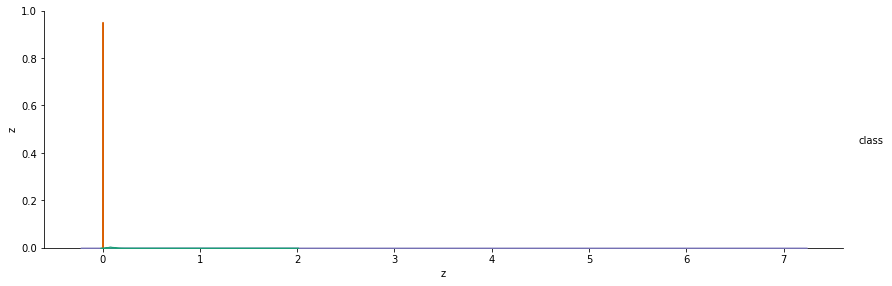

In [5]:
sns.pairplot(data = df, palette = 'Dark2', vars='z', hue = 'class', height=4, aspect=3)

In [ ]:
sns.countplot(df['z'], palette = 'magma')

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cModelMag_r', ylabel='Density'>

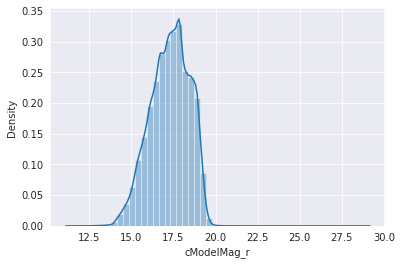

In [19]:
sns.distplot(df[df['class'] == 'STAR'].cModelMag_r)

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cModelMag_r', ylabel='Density'>

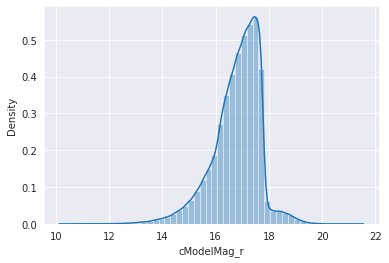

In [20]:
sns.distplot(df[df['class'] == 'GALAXY'].cModelMag_r)

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cModelMag_r', ylabel='Density'>

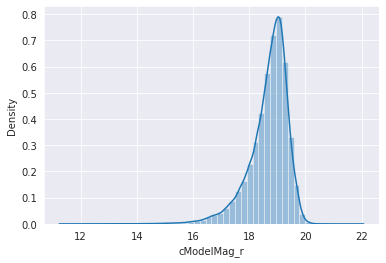

In [21]:
sns.distplot(df[df['class'] == 'QSO'].cModelMag_r)

# Exploratory Data Analysis

In [6]:
df.shape

(1156692, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156692 entries, 0 to 1156691
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   specObjID    1156692 non-null  float64
 1   objID        1156692 non-null  int64  
 2   ra           1156692 non-null  float64
 3   dec          1156692 non-null  float64
 4   mjd          1156692 non-null  int64  
 5   plate        1156692 non-null  int64  
 6   z            1156692 non-null  float64
 7   zErr         1156692 non-null  float64
 8   class        1156692 non-null  object 
 9   subClass     913522 non-null   object 
 10  psfMag_u     1156692 non-null  float64
 11  psfMag_g     1156692 non-null  float64
 12  psfMag_r     1156692 non-null  float64
 13  psfMag_i     1156692 non-null  float64
 14  psfMag_z     1156692 non-null  float64
 15  cModelMag_u  1156692 non-null  float64
 16  cModelMag_g  1156692 non-null  float64
 17  cModelMag_r  1156692 non-null  float64
 18  cM

In [8]:
df.describe()

,specObjID,objID,ra,dec,mjd,plate,z,zErr,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
count,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06,1.156692e+06
mean,3.123219e+18,1.237663e+18,1.746128e+02,2.389755e+01,5.405612e+04,2.773889e+03,2.220919e-01,1.235397e-02,1.973156e+01,1.846216e+01,1.790823e+01,1.765083e+01,1.746056e+01,1.907472e+01,1.782445e+01,1.726659e+01,1.700244e+01,1.683277e+01
std,2.553497e+18,7.249005e+12,8.424067e+01,2.005919e+01,1.592507e+03,2.267947e+03,5.546740e-01,6.434034e+00,1.218724e+00,1.127668e+00,1.124228e+00,1.125494e+00,1.123533e+00,1.070412e+00,1.083572e+00,1.163807e+00,1.222961e+00,1.280223e+00
min,2.994897e+17,1.237646e+18,6.294999e-04,-1.970271e+01,5.157800e+04,2.660000e+02,-1.154793e-02,-6.000000e+00,6.752299e+00,7.464891e+00,8.449972e+00,7.611034e+00,6.444011e+00,1.052260e+01,1.069118e+01,1.033073e+01,1.027642e+01,8.829096e+00
25%,1.393937e+18,1.237658e+18,1.310247e+02,6.290696e+00,5.278100e+04,1.238000e+03,-5.784358e-05,9.094318e-06,1.898979e+01,1.785412e+01,1.727241e+01,1.700442e+01,1.680262e+01,1.845115e+01,1.716716e+01,1.651981e+01,1.619344e+01,1.597721e+01
50%,2.498472e+18,1.237662e+18,1.776739e+02,2.262042e+01,5.381500e+04,2.219000e+03,3.256447e-02,1.359500e-05,1.994045e+01,1.872858e+01,1.812210e+01,1.782650e+01,1.758988e+01,1.918027e+01,1.793653e+01,1.727926e+01,1.696235e+01,1.675945e+01
75%,3.612032e+18,1.237667e+18,2.235213e+02,3.914141e+01,5.486100e+04,3.208000e+03,1.089530e-01,2.359312e-05,2.071812e+01,1.928481e+01,1.873960e+01,1.849887e+01,1.832641e+01,1.980668e+01,1.855206e+01,1.806926e+01,1.790289e+01,1.782182e+01
max,1.317780e+19,1.237681e+18,3.599998e+02,8.485214e+01,5.854300e+04,1.170400e+04,7.011245e+00,6.753216e+03,2.884615e+01,2.160802e+01,2.209705e+01,2.876009e+01,1.979119e+01,2.890191e+01,2.251011e+01,2.892497e+01,3.268382e+01,2.004005e+01


In [9]:
df[df['z'] > 2].shape

(38847, 20)

In [10]:
df['z'].value_counts()

 0.000000    5088
 0.000461     101
 0.004153      45
-0.004136      33
-0.004136      16
             ... 
 0.043414       1
 0.952470       1
 0.000035       1
 0.048233       1
-0.000070       1
Name: z, Length: 1115390, dtype: int64

In [11]:
#df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
#df.head(3)

In [12]:
df.isnull().sum()
df1 = df.copy()

# Визуализируем данные

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

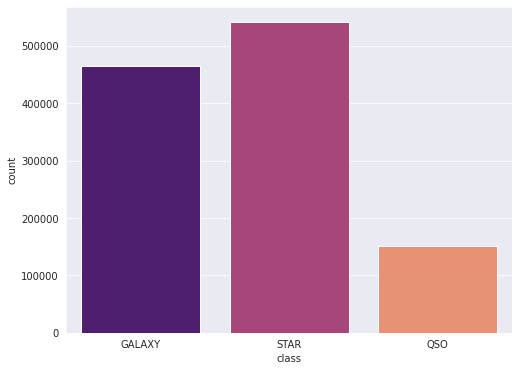

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'magma')

Распределения звезд по подклассам:

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

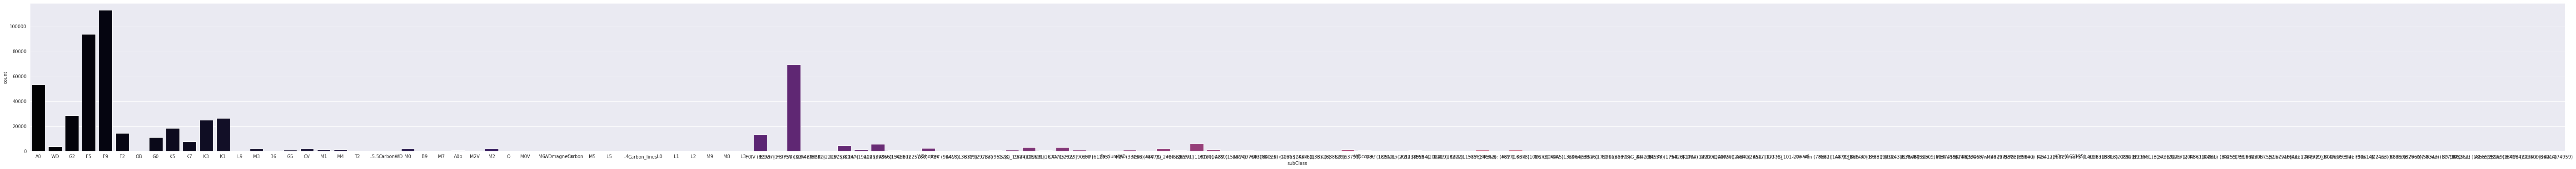

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df[df['class']=='STAR']['subClass'], palette = 'magma')

In [17]:
df[df['class']=='STAR']['subClass'].value_counts()

F9                 112632
F5                  93336
F3/F5V (30743)      69045
A0                  53306
G2                  28632
                    ...  
F6Iab: (187929)         1
B9 (105262)             1
B2Ve (164284)           1
A5Ia (17378)            1
B0IVe (5394)            1
Name: subClass, Length: 151, dtype: int64

In [23]:
df[df['subClass']=='O'].shape

(233, 20)

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

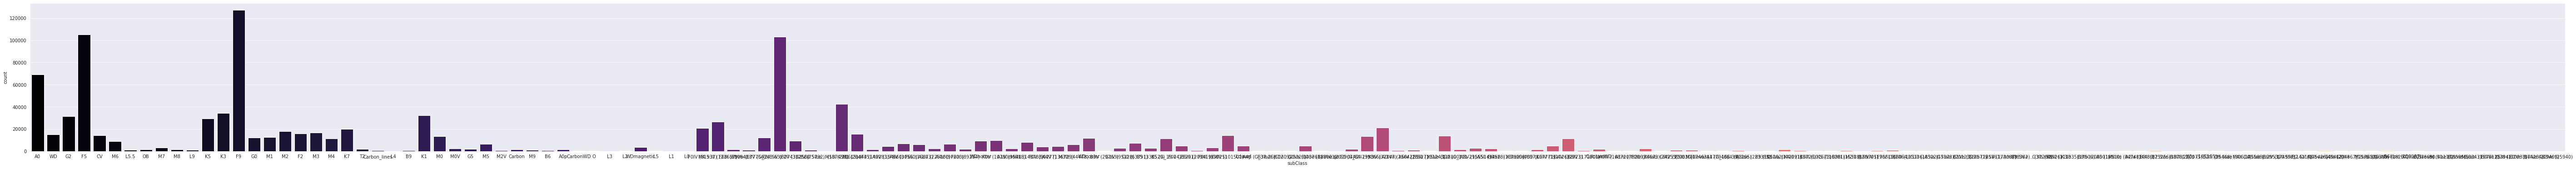

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df_star['subClass'], palette = 'magma')

In [25]:
df_star['subClass'].value_counts()

F9                 127116
F5                 105307
F3/F5V (30743)     102934
A0                  69112
M5III (221615)      42675
                    ...  
B7IVe (209409)         26
K5III (120933)         16
B3Ve (25940)           16
B2Vne (202904)         14
M5Iab: (197812)        12
Name: subClass, Length: 164, dtype: int64

In [31]:
df_star[df_star['subClass']=='O'].shape

(559, 20)

In [157]:
df_star[df_star['subClass']=='OB'].shape

(1498, 20)

In [ ]:
sns.pairplot(data = df, palette = 'Dark2', hue = 'class')

<AxesSubplot:xlabel='class', ylabel='mjd'>

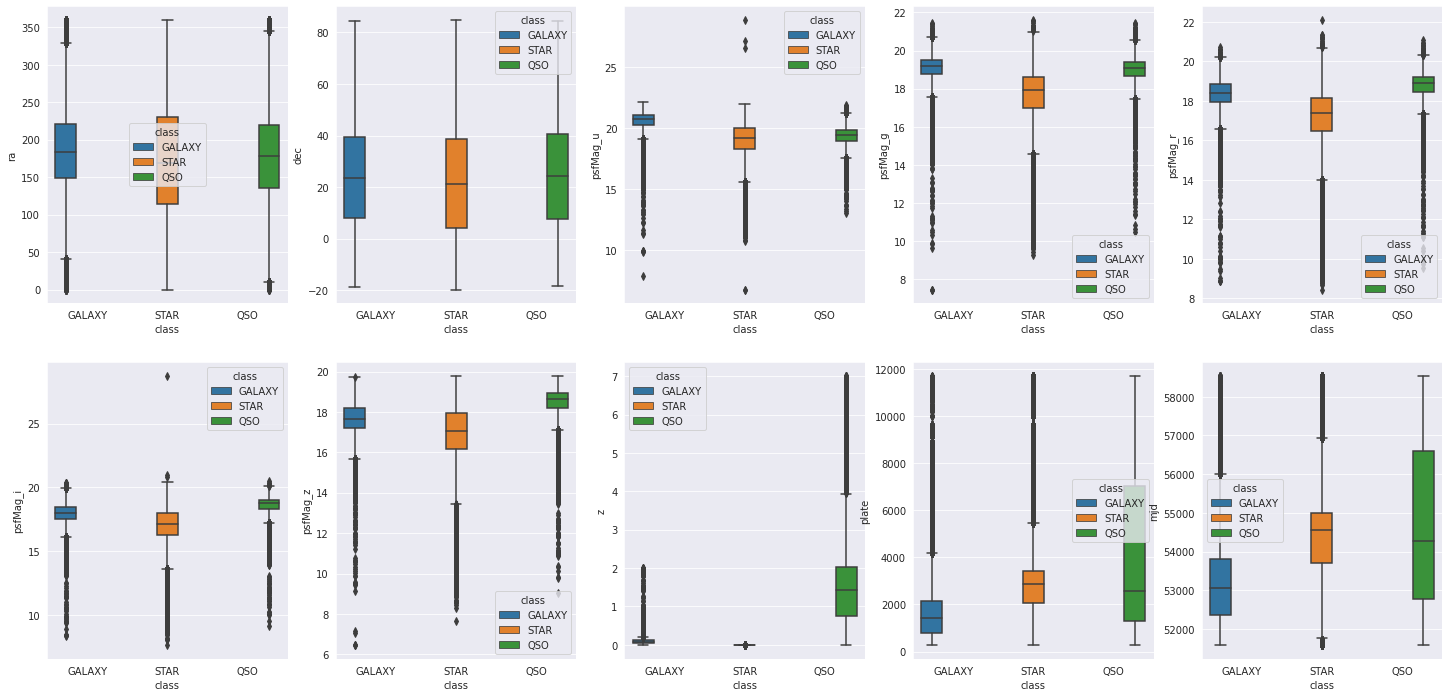

In [14]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = df) 
sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = df)
sns.boxplot(ax=ax3, x = 'class', y = 'psfMag_u', hue = 'class', data = df)
sns.boxplot(ax=ax4, x = 'class', y = 'psfMag_g', hue = 'class', data = df)
sns.boxplot(ax=ax5, x = 'class', y = 'psfMag_r', hue = 'class', data = df)
sns.boxplot(ax=ax6, x = 'class', y = 'psfMag_i', hue = 'class', data = df)
sns.boxplot(ax=ax7, x = 'class', y = 'psfMag_z', hue = 'class', data = df)
sns.boxplot(ax=ax8, x = 'class', y = 'z', hue = 'class', data = df)
sns.boxplot(ax=ax9, x = 'class', y = 'plate', hue = 'class', data = df)
sns.boxplot(ax=ax10, x = 'class', y = 'mjd', hue = 'class', data = df)

In [17]:
#sns.boxplot(x = 'class', y = 'z', hue = 'class', data = df1)

In [ ]:
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'psfMag_i', y='psfMag_z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'psfMag_r', y='psfMag_g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='z', ylabel='Density'>

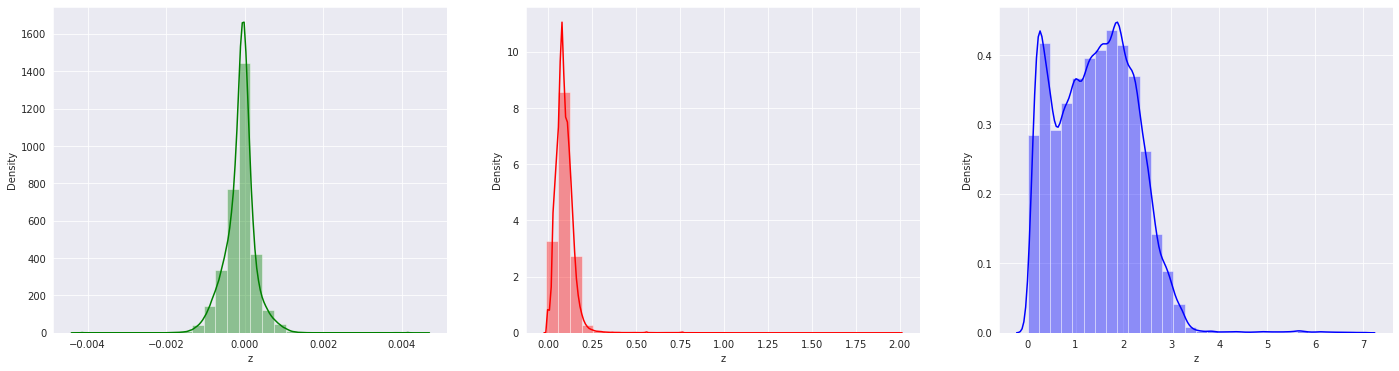

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].z, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].z, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].z, ax = ax3, bins = 30, color = 'b')

Распределение по признаку psfMag_r

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='psfMag_r', ylabel='Density'>

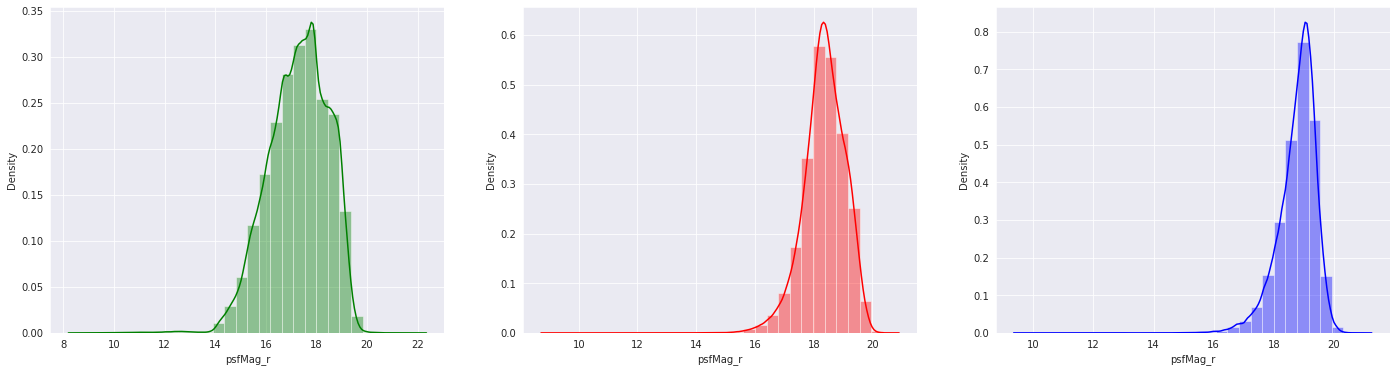

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].psfMag_r, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].psfMag_r, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].psfMag_r, ax = ax3, bins = 30, color = 'b')

In [15]:
df.var()

specObjID      6.520349e+36
objID          5.254807e+25
ra             7.096491e+03
dec            4.023710e+02
mjd            2.536079e+06
plate          5.143582e+06
z              3.076633e-01
zErr           4.139679e+01
psfMag_u       1.485289e+00
psfMag_g       1.271635e+00
psfMag_r       1.263888e+00
psfMag_i       1.266737e+00
psfMag_z       1.262325e+00
cModelMag_u    1.145782e+00
cModelMag_g    1.174128e+00
cModelMag_r    1.354446e+00
cModelMag_i    1.495634e+00
cModelMag_z    1.638972e+00
dtype: float64

<AxesSubplot:>

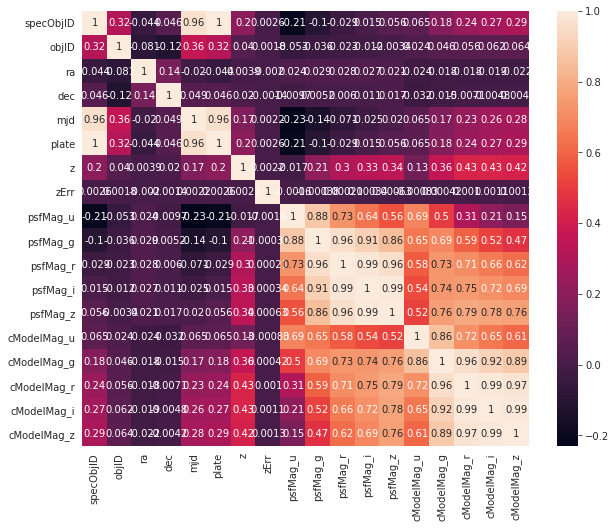

In [21]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

# Feature Engineering

Изеняем метки класса в целые числа

In [6]:
df3 = df.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,2.994897e+17,1237648720142401611,146.71421,-1.041304,51602,266,0.021275,0.000009,2,NaN,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063
1,2.994897e+17,1237648720142401611,146.71421,-1.041304,51630,266,0.021222,0.000009,2,STARFORMING,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063
2,2.994905e+17,1237650795146445031,146.62857,-0.765137,51630,266,0.064656,0.000021,2,STARFORMING,20.89120,19.14573,18.15873,17.71922,17.33419,19.67375,17.60075,16.74682,16.30468,15.92988
3,2.994911e+17,1237648720142401670,146.63167,-0.988278,51630,266,0.052654,0.000009,2,STARFORMING,20.95082,19.93240,19.58940,19.14601,19.03190,19.41007,18.32431,17.84381,17.49257,17.44579
4,2.994916e+17,1237650794609574093,146.60721,-1.240753,51602,266,0.090633,0.000027,2,NaN,20.81802,19.12126,18.20515,17.74424,17.44748,18.93758,17.33248,16.35845,15.94122,15.62764


Создадим дополнительную выборуку, чтобы проэксперементировать с классификаторами, отделяющие только STAR

In [120]:
df2 = df3.copy()
labels = {'STAR':0, 'GALAXY':1, 'QSO':1}
df2.replace({'class':labels}, inplace = True)
df2.head()

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,2.994897e+17,1237648720142401611,146.71421,-1.041304,51602,266,0.021275,0.000009,1,NaN,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063
1,2.994897e+17,1237648720142401611,146.71421,-1.041304,51630,266,0.021222,0.000009,1,STARFORMING,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063
2,2.994905e+17,1237650795146445031,146.62857,-0.765137,51630,266,0.064656,0.000021,1,STARFORMING,20.89120,19.14573,18.15873,17.71922,17.33419,19.67375,17.60075,16.74682,16.30468,15.92988
3,2.994911e+17,1237648720142401670,146.63167,-0.988278,51630,266,0.052654,0.000009,1,STARFORMING,20.95082,19.93240,19.58940,19.14601,19.03190,19.41007,18.32431,17.84381,17.49257,17.44579
4,2.994916e+17,1237650794609574093,146.60721,-1.240753,51602,266,0.090633,0.000027,1,NaN,20.81802,19.12126,18.20515,17.74424,17.44748,18.93758,17.33248,16.35845,15.94122,15.62764


В оригинальной тетрадке была отмечена зависимость признаков u, g, r, i, z (в этом можно убедиться на графиках выше), поэтому было осуществлено сжатие данных признаков с помощью PCA. Я этого делать не буду, т.к. хочу получить зависимость точности классификации STAR конкретно от признака r (звездной величины).

In [7]:
df = df.sort_values(by='cModelMag_r')

Data separation into features and labels

In [8]:
X = df.drop(['class','subClass'], axis = 1).values
y = df['class'].values
X.shape

(1156692, 18)

In [128]:
X2 = df2.drop(['class','subClass'], axis = 1).values
y2 = df2['class'].values
X2.shape

(1156692, 18)

Дополнительная выборка только звезд, на которой так же можно проверять точность:

In [69]:
Xs = df_star.drop(['class','subClass'], axis = 1).values
ys = np.ones(Xs.shape[0])
Xs.shape

(1103720, 18)

Разделение данных на обучающие и тестовые

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)

In [129]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 123)

In [130]:
np.unique(y_train, return_counts = True)

(array([1, 2, 3]), array([162359, 139407,  45241]))

In [131]:
np.unique(y2_test, return_counts = True)

(array([0, 1]), array([162406, 184602]))

Учитывая колличество элементов в каждом значения признака class, тренировочная выборка нам подходит 

Because of presence of outliers we will be using RobustScaler to perform scaling on the data. For more about it look here:
https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [132]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)
X = robust.transform(X)
Xs = robust.transform(Xs)
X2_train = robust.fit_transform(X2_train)
X2_test = robust.transform(X2_test)
Xs.shape

(1103720, 18)

In [14]:
#переменные для разделения выборки по признаку cModelMag_r:
n = 30
m = df['cModelMag_r'].min()
N = (df['cModelMag_r'].max() - m) / n

def print_plot(ml): #функция построения графика зависимости метрик классификации от r
    
    precision = []
    recall = []
    f1 = []
    r_mean = []
    y_pred_all = ml.predict(X)

    for i in range(0, n):
        indx = (df['cModelMag_r'] >= (m + N * i)) & (df['cModelMag_r'] <= (m + N * (i + 1))) #создаем выборку с необходимым нам диапазоном r
        if len(y[indx]) > 100 and df[indx & df['class'] == 1].shape[0] > 100:    #не будем брать слишком маленькие выборки
            h = classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)
            precision.append(h['1']['precision'])
            recall.append(h['1']['recall'])
            f1.append(h['1']['f1-score'])
            r_mean.append(df['cModelMag_r'][indx].mean())
            
    plt.figure(figsize = (5,4))
    plt.title('Зависимость precision от признкака cModelMag_r:')
    plt.plot(r_mean, precision, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость recall от признкака cModelMag_r:')
    plt.plot(r_mean, recall, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость f1 от признкака cModelMag_r:')
    plt.plot(r_mean, f1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    #indx = df['cModelMag_r'] < 15
    #indx1 = df['cModelMag_r'] < 18 & df['cModelMag_r'] > 16
    #return classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)['1']['precision'], 

# Классификаторы

Logistic Regression 

In [109]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)


Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99    378577
           2       0.97      0.98      0.98    325791
           3       0.99      0.92      0.95    105317

    accuracy                           0.98    809685
   macro avg       0.98      0.96      0.97    809685
weighted avg       0.98      0.98      0.98    809685

Confusion Matrix: 
 [[377955    622      0]
 [  6414 317970   1407]
 [   954   7709  96654]]
Training Score:  0.9790436504162741
Testing Score:  0.9788732655291873


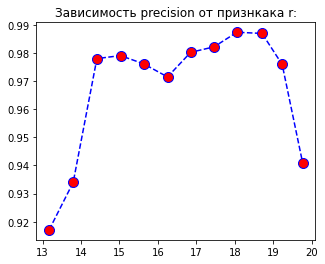

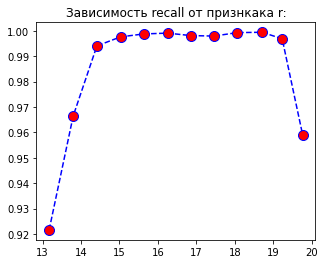

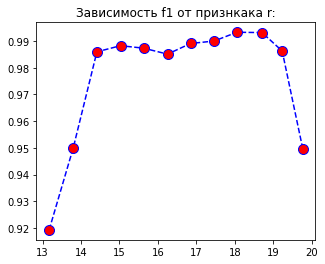

In [110]:
#lr_test_acc = print_plot(lr)
print_plot(lr)

In [116]:
ys_pr = lr.predict(Xs)
print('Classification Report: \n', classification_report(ys, ys_pr))
print('Confusion Matrix: \n', confusion_matrix(ys, ys_pr))
lr_s = lr.score(Xs, ys)
print('Star Score: ', lr_s)
print(ys)
print(ys_pr)

/home/nadia/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.98      0.99   1103720
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98   1103720
   macro avg       0.50      0.49      0.49   1103720
weighted avg       1.00      0.98      0.99   1103720

Confusion Matrix: 
 [[1079814   23906]
 [      0       0]]
Star Score:  0.9783405211466676
[1. 1. 1. ... 1. 1. 1.]
[2 2 2 ... 1 1 1]


Это проверка классификатора, отделяющего только звезды и не звезды (пока не совсем правильноработает)

In [133]:
lr2 = LogisticRegression(max_iter=500)
lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)
print('Classification Report: \n', classification_report(y2_test, y2_pred))
print('Confusion Matrix: \n', confusion_matrix(y2_test, y2_pred))
lr2_train_acc = lr2.score(X2_train, y2_train)
print('Training Score: ', lr2_train_acc)
lr2_test_acc = lr2.score(X2_test, y2_test)
print('Testing Score: ', lr2_test_acc)


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    162406
           1       1.00      0.99      1.00    184602

    accuracy                           1.00    347008
   macro avg       1.00      1.00      1.00    347008
weighted avg       1.00      1.00      1.00    347008

Confusion Matrix: 
 [[162245    161]
 [  1387 183215]]
Training Score:  0.9955427055493254
Testing Score:  0.9955390077462191


In [136]:
print(y2)
print(len(y2))
sum(y2)

[1 1 1 ... 1 1 1]
1156692


615756

In [135]:
ys2_pr = lr2.predict(Xs)
print('Classification Report: \n', classification_report(ys, ys2_pr))
print('Confusion Matrix: \n', confusion_matrix(ys, ys2_pr))
lr2_s = lr2.score(Xs, ys)
print('Star Score: ', lr2_s)
print(ys)
print(ys2_pr)

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00   1103720

    accuracy                           1.00   1103720
   macro avg       1.00      1.00      1.00   1103720
weighted avg       1.00      1.00      1.00   1103720

Confusion Matrix: 
 [[1103720]]
Star Score:  1.0
[1. 1. 1. ... 1. 1. 1.]
[1 1 1 ... 1 1 1]


In [137]:
sub_cl = df_star['subClass'].unique()
sub_cl.shape

(164,)

In [163]:
sub = []
score = []
for i in range(sub_cl.shape[0]):
    indx = df_star['subClass']==sub_cl[i]
    if df_star[indx].shape[0] > 10: 
        
        ys_pr = lr.predict(Xs[indx])
        #print('Classification Report: \n', classification_report(ys[indx], ys_pr))
        #print('Confusion Matrix: \n', confusion_matrix(ys[indx], ys_pr))
        lr_s = lr.score(Xs[indx], ys[indx])
        #print('Star Score: ', lr_s)
        #print(sub_cl[i], df_star[indx].shape[0], lr_s)
        sub.append(sub_cl[i])
        #print(sub)
        score.append(lr_s)
#print(sub)

#plt.figure(figsize = (5,4))
#plt.title('Зависимость precision от признкака r:')
#plt.plot(score, sub, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)


In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(score, palette = 'magma')

In [165]:
M = [list(a) for a in zip(sub, score)]
M

[['A0', 0.9376085195045722],
 ['WD', 0.8596373854285141],
 ['G2', 0.9633907100367042],
 ['F5', 0.9685111151205523],
 ['CV', 0.9851154953310398],
 ['M6', 0.9194905617466455],
 ['L5.5', 0.928110599078341],
 ['OB', 0.8731642189586115],
 ['M7', 0.8508454106280193],
 ['M8', 0.7925591882750845],
 ['L9', 0.9181395348837209],
 ['K5', 0.9656453426945231],
 ['K3', 0.9771326771998481],
 ['F9', 0.9850451556059032],
 ['G0', 0.9566696363489107],
 ['M1', 0.9597347607254134],
 ['M2', 0.9649816278810823],
 ['F2', 0.9601002192295647],
 ['M3', 0.9586063132817153],
 ['M4', 0.9530230918385334],
 ['K7', 0.954122908396563],
 ['T2', 0.9272637308263236],
 ['Carbon_lines', 0.9302631578947368],
 ['L4', 0.9],
 ['B9', 0.892459826946848],
 ['K1', 0.9833841558279918],
 ['M0', 0.9527407407407408],
 ['M0V', 0.9723461195361285],
 ['G5', 0.9809941520467836],
 ['M5', 0.9215159653834676],
 ['M2V', 0.9437229437229437],
 ['Carbon', 0.975],
 ['M9', 0.8395245170876672],
 ['B6', 0.9142857142857143],
 ['A0p', 0.9188243526941917

In [85]:
indx = df_star['subClass']==sub_cl[2]
Xs[indx]

array([[2.99498198e+17, 1.23765080e+18, 1.46943860e+02, ...,
        1.64497000e+01, 1.62079000e+01, 1.60963300e+01],
       [2.99499848e+17, 1.23765080e+18, 1.46943860e+02, ...,
        1.64497000e+01, 1.62079000e+01, 1.60963300e+01],
       [3.02987773e+17, 1.23764872e+18, 1.50964100e+02, ...,
        1.71706200e+01, 1.70224200e+01, 1.69663100e+01],
       ...,
       [4.57233590e+17, 1.23766641e+18, 3.53278460e+01, ...,
        1.70726000e+01, 1.69294300e+01, 1.68643400e+01],
       [4.57256956e+17, 1.23766378e+18, 3.62452220e+01, ...,
        1.56635500e+01, 1.55093200e+01, 1.54671700e+01],
       [4.57256956e+17, 1.23766378e+18, 3.62452220e+01, ...,
        1.56635500e+01, 1.55093200e+01, 1.54671700e+01]])

Support Vector Classification

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

In [1]:
#svc_test_acc = print_plot(svc)

Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train)
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

In [ ]:
#dt_test_acc = print_plot(dt)

Ensemble Methods

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

In [ ]:
#rf_test_acc = print_plot(rf)

In [ ]:
adb = AdaBoostClassifier(rf)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train)
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

In [ ]:
#adb_test_acc = print_plot(adb)

In [ ]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n0', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train)
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

In [ ]:
#gdb_test_acc = print_plot(gdb)

K Nearest Neighbors Classification

In [17]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Plotting error rate vs. number of neighbors

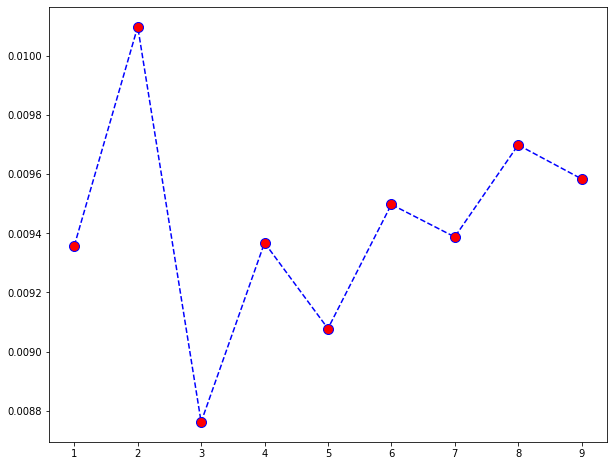

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train)
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00    378577
           2       0.99      0.99      0.99    325791
           3       0.98      0.98      0.98    105317

    accuracy                           0.99    809685
   macro avg       0.99      0.99      0.99    809685
weighted avg       0.99      0.99      0.99    809685

Confusion Matrix: 
 [[377973    459    145]
 [  2273 321870   1648]
 [   289   2280 102748]]
Training Score:  0.993691769906659
Testing Score:  0.9912385680851196


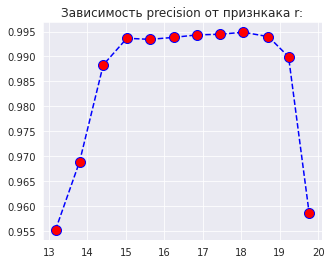

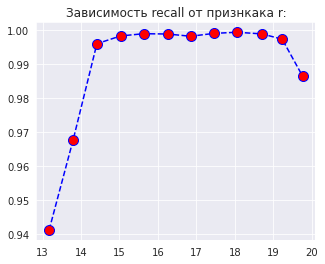

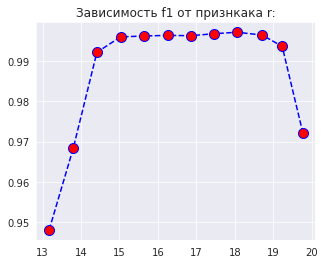

In [88]:
#knn_test_acc = print_plot(knn)
print_plot(knn)

In [28]:
ys_pr = knn.predict(Xs)
print('Classification Report: \n', classification_report(ys, ys_pr))
print('Confusion Matrix: \n', confusion_matrix(ys, ys_pr))
knn_s = knn.score(Xs, ys)
print('Star Score: ', knn_s)

/home/nadia/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.47      0.64   1156692
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.47   1156692
   macro avg       0.33      0.16      0.21   1156692
weighted avg       1.00      0.47      0.64   1156692

Confusion Matrix: 
 [[543489 463637 149566]
 [     0      0      0]
 [     0      0      0]]
Star Score:  0.46986492514861344


In [ ]:
#print([df['r'].min(), df['r'].max()]) #интервал значений r

Проверка точности была проведена не для всех интерваллов r, из-за осутсвия достаточного кол-ва данных о них. Но заметим сходство для графиков precision от признкака r. Наименьшую точность классификаторы показывают для r < 15. 
Сравним показатели precision при r < 15 для разных классификаторов.

In [ ]:
trace1 = go.Bar(
    x=['Logistic Regression','SVC','Decision Tree','Random Forest','AdaBoost','Gradient Boosting','KNN'],
    y=[lr_test_acc,svc_test_acc,dt_test_acc,rf_test_acc,adb_test_acc,gdb_test_acc,knn_test_acc],
    name = 'Accuracy Comparisons of the 4 algorithms',
        marker=dict(
                
    ),
)

layout = go.Layout(
    title='Precision классификации звезд с r < 15'
)

data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratio")

Так же стоит отметить "провисание" precision в интервале 16 < r < 18. Это можно объяснить тем, что такие значения r характерны как для звезд, так и для галактик:

In [ ]:
#sns.pairplot(data = df1, palette = 'Dark2', vars='r', hue = 'class', height=4, aspect=3)